In [ ]:
# Import the modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
from google.colab import drive
import numpy as np
import tensorflow.keras.layers as kl
import os, random, math
from pprint import pprint
from datetime import datetime as dt

import keras as k

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/DeepLearning_2020/FinalProject/Big_Dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


In [ ]:
# Data configuration
#Path to image folders
training_set_folder = data_path + '/Train' 
test_set_folder     = data_path + '/Test'

# Model configuration
batch_size = 32
#Image size width x height, RGB= 3 channels
img_width, img_height, img_num_channels = 50, 50, 3
loss_function = sparse_categorical_crossentropy
no_classes = 25 
no_epochs = 20
optimizer = Adam()
verbosity = 1     #to display output on scren

In [ ]:
#TEST
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

'''Our training data will use transformations to try as much variety as possible out of our images.
 However, for the validation data, we'll apply just one transformation,
 rescaling, because we want our validation set to reflect "real world"
 performance.'''
# So we create a generator. 
# Validation data shouldn't be augmented, but it should also be scaled, so we rescale the pixel values from [0, 255] to [0, 1] interval
test_datagen = ImageDataGenerator(rescale=1./255)

#create images iterators 
"""
flow_from_directory() automatically infers the labels from the directory structure of the folders containing images. 
Every subfolder inside the training-folder(or validation-folder) will be considered a target class.
"""
test_datagen = test_datagen.flow_from_directory(
        test_set_folder,
        batch_size = batch_size,
        target_size = (50, 50),
        class_mode = 'sparse')

Found 4029 images belonging to 25 classes.


In [ ]:
# TRAIN
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
#In the case of the training set we apply several transformations, and of course also the reescaling.
train_datagen = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_datagen = train_datagen.flow_from_directory(
        training_set_folder,
        batch_size = batch_size,
        target_size = (50, 50),
        class_mode = 'sparse')

Found 12625 images belonging to 25 classes.


In [ ]:
#In order to generate a subplot with a sample of images
def get_subplot_grid(mylist, columns, figwidth, figheight):
    plot_rows = math.ceil(len(mylist) / 2.)
    fig, ax = plt.subplots(plot_rows, 2, sharey=True, sharex=False)
    fig.set_figwidth(figwidth)
    fig.set_figheight(figheight)
    fig.subplots_adjust(hspace=0.4)
    axflat = ax.flat
    for ax in axflat[ax.size - 1:len(mylist) - 1:-1]:
        ax.set_visible(False)

    return fig, axflat

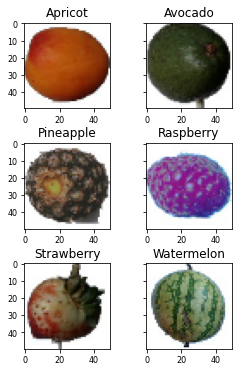

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot some fruits with the corresponding labels
test_images_classes = ["Apricot","Avocado","Pineapple","Raspberry","Strawberry","Watermelon"]

test_images=[]

plt.rc('font',family = 'sans-serif',  size=8)
fig, axflat = get_subplot_grid(mylist=test_images_classes, columns=2, figwidth=4, figheight=6)

for idx, label in enumerate(test_images_classes):
    image_folder = os.path.join(training_set_folder, label)
    image_file = os.path.join(image_folder, random.choice(os.listdir(image_folder)) )
    loaded_image = k.preprocessing.image.load_img(path=image_file,target_size=(img_width, img_height, img_num_channels))
    #convert to array and resample dividing by 255
    img_array = k.preprocessing.image.img_to_array(loaded_image) / 255.
    test_images.append({"idx":idx, "image":img_array, "label": label})
    
    axflat[idx].set_title(label, size=12)
    axflat[idx].imshow(img_array)
plt.show()
plt.gcf().clear()

In [ ]:
'''We will see how many fruits of each type the training dataset contains'''
#train_images_iter.class_indices contain the label-index map for each inferred class
trained_classes_labels = list(train_datagen.class_indices.keys())
print(train_datagen.class_indices)
#train_images_iter.classes contains a list of classes of each image
unique, counts = np.unique(train_datagen.classes, return_counts=True)
print ("number of samples per class")
dict(zip(train_datagen.class_indices, counts))

{'Apple': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Blueberry': 4, 'Cauliflower': 5, 'Cocos': 6, 'Corn': 7, 'Kiwi': 8, 'Lemon': 9, 'Mandarine': 10, 'Mango': 11, 'Maracuja': 12, 'Onion Red': 13, 'Orange': 14, 'Papaya': 15, 'Pear': 16, 'Pepino': 17, 'Pepper Yellow': 18, 'Pineapple': 19, 'Potato Sweet': 20, 'Raspberry': 21, 'Strawberry': 22, 'Tomato': 23, 'Watermelon': 24}
number of samples per class


{'Apple': 480,
 'Apricot': 492,
 'Avocado': 427,
 'Banana': 490,
 'Blueberry': 462,
 'Cauliflower': 702,
 'Cocos': 490,
 'Corn': 450,
 'Kiwi': 466,
 'Lemon': 492,
 'Mandarine': 490,
 'Mango': 490,
 'Maracuja': 490,
 'Onion Red': 450,
 'Orange': 479,
 'Papaya': 492,
 'Pear': 492,
 'Pepino': 490,
 'Pepper Yellow': 666,
 'Pineapple': 490,
 'Potato Sweet': 450,
 'Raspberry': 490,
 'Strawberry': 492,
 'Tomato': 738,
 'Watermelon': 475}

In [ ]:
'''We will see how many fruits of each type the test dataset contains'''

#test_images_iter.class_indices contain the label-index map for each inferred class
test_classes_labels = list(test_datagen.class_indices.keys())
print(test_datagen.class_indices)
#test_images_iter.classes contains a list of classes of each image
unique, counts = np.unique(test_datagen.classes, return_counts=True)
print ("number of samples per class")
dict(zip(test_datagen.class_indices, counts))

{'Apple': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Blueberry': 4, 'Cauliflower': 5, 'Cocos': 6, 'Corn': 7, 'Kiwi': 8, 'Lemon': 9, 'Mandarine': 10, 'Mango': 11, 'Maracuja': 12, 'Onion Red': 13, 'Orange': 14, 'Papaya': 15, 'Pear': 16, 'Pepino': 17, 'Pepper Yellow': 18, 'Pineapple': 19, 'Potato Sweet': 20, 'Raspberry': 21, 'Strawberry': 22, 'Tomato': 23, 'Watermelon': 24}
number of samples per class


{'Apple': 160,
 'Apricot': 164,
 'Avocado': 143,
 'Banana': 166,
 'Blueberry': 154,
 'Cauliflower': 172,
 'Cocos': 166,
 'Corn': 150,
 'Kiwi': 156,
 'Lemon': 164,
 'Mandarine': 166,
 'Mango': 166,
 'Maracuja': 166,
 'Onion Red': 150,
 'Orange': 160,
 'Papaya': 164,
 'Pear': 164,
 'Pepino': 166,
 'Pepper Yellow': 180,
 'Pineapple': 166,
 'Potato Sweet': 150,
 'Raspberry': 166,
 'Strawberry': 164,
 'Tomato': 149,
 'Watermelon': 157}

In [ ]:
# Create the model 1
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(20, activation='relu'))
model1.add(Dense(no_classes, activation='softmax'))

model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                368660    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                525       
Total params: 370,081
Trainable params: 370,081
Non-trainable params: 0
__________________________________________________

In [10]:
model1.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Start testing
history = model1.fit(
        train_datagen,
        epochs = no_epochs,
        validation_data = test_datagen,

        shuffle = False)



Epoch 1/20
395/395 [==============================] - 9288s 24s/step - loss: 1.8538 - accuracy: 0.4177 - val_loss: 0.6325 - val_accuracy: 0.8426
Epoch 2/20
395/395 [==============================] - 61s 155ms/step - loss: 0.4778 - accuracy: 0.8584 - val_loss: 0.2968 - val_accuracy: 0.9126
Epoch 3/20
395/395 [==============================] - 60s 151ms/step - loss: 0.2636 - accuracy: 0.9240 - val_loss: 0.2650 - val_accuracy: 0.9322
Epoch 4/20
395/395 [==============================] - 60s 152ms/step - loss: 0.1851 - accuracy: 0.9472 - val_loss: 0.2508 - val_accuracy: 0.9399
Epoch 5/20
395/395 [==============================] - 62s 156ms/step - loss: 0.1402 - accuracy: 0.9573 - val_loss: 0.2271 - val_accuracy: 0.9404
Epoch 6/20
395/395 [==============================] - 60s 152ms/step - loss: 0.1171 - accuracy: 0.9641 - val_loss: 0.1526 - val_accuracy: 0.9645
Epoch 7/20
395/395 [==============================] - 60s 153ms/step - loss: 0.1043 - accuracy: 0.9705 - val_loss: 0.1983 - val_ac

In [11]:
score = model1.evaluate(test_datagen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


126/126 [==============================] - 9s 73ms/step - loss: 0.1269 - accuracy: 0.9774
Test loss: 0.12694896757602692
Test accuracy: 0.9774137735366821


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


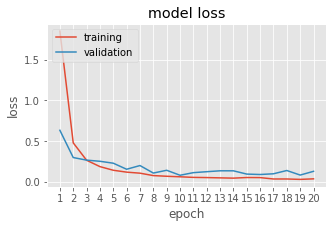

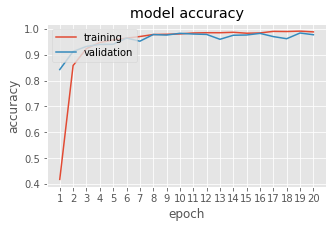

In [12]:
print(history.history.keys())

plt.style.use('ggplot')

xepochs = [i+1 for i in range(0, len(history.history['loss']))]
plt.figure(figsize=(5,3))
# Loss
#plt.ylim([-0.1,0.5])
plt.plot(xepochs, history.history['loss'])
plt.plot(xepochs, history.history['val_loss'])
plt.xticks(xepochs)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Accuracy
#plt.ylim([0.7,1.05])
plt.figure(figsize=(5,3))
plt.plot(xepochs, history.history['accuracy'])
plt.plot(xepochs, history.history['val_accuracy'])
plt.xticks(xepochs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [13]:
#probar new model

newmodel=Sequential()
newmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
newmodel.add(MaxPooling2D(pool_size=(2, 2)))
newmodel.add(kl.BatchNormalization())

newmodel.add(Dropout(0.2))

newmodel.add(Flatten())

newmodel.add(Dense(20, activation='relu'))
newmodel.add(Dense(no_classes, activation='softmax'))
newmodel.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                368660    
_________________________________________________________________
dense_3 (Dense)              (None, 25)               

In [14]:

newmodel.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

from datetime import datetime as dt
start = dt.now()
history = newmodel.fit(
  # training data
  train_datagen,

  epochs = no_epochs, 

  # validation data
  validation_data = test_datagen,
  
)


Epoch 1/20
395/395 [==============================] - 62s 157ms/step - loss: 2.4726 - accuracy: 0.2354 - val_loss: 2.4608 - val_accuracy: 0.2177
Epoch 2/20
395/395 [==============================] - 62s 157ms/step - loss: 1.7466 - accuracy: 0.4043 - val_loss: 1.5802 - val_accuracy: 0.4353
Epoch 3/20
395/395 [==============================] - 62s 156ms/step - loss: 0.6696 - accuracy: 0.7504 - val_loss: 0.7025 - val_accuracy: 0.7488
Epoch 4/20
395/395 [==============================] - 62s 157ms/step - loss: 0.4448 - accuracy: 0.8369 - val_loss: 0.3157 - val_accuracy: 0.8796
Epoch 5/20
395/395 [==============================] - 63s 160ms/step - loss: 0.2824 - accuracy: 0.8981 - val_loss: 0.2997 - val_accuracy: 0.9183
Epoch 6/20
395/395 [==============================] - 63s 160ms/step - loss: 0.2334 - accuracy: 0.9151 - val_loss: 0.4371 - val_accuracy: 0.8513
Epoch 7/20
395/395 [==============================] - 63s 159ms/step - loss: 0.2007 - accuracy: 0.9293 - val_loss: 0.1821 - val_ac

In [15]:
score = newmodel.evaluate(test_datagen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

126/126 [==============================] - 9s 73ms/step - loss: 0.0700 - accuracy: 0.9831
Test loss: 0.06995341926813126
Test accuracy: 0.9831223487854004


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


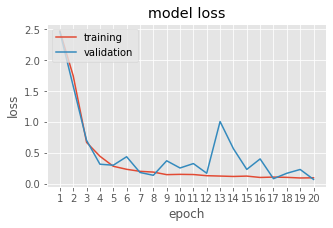

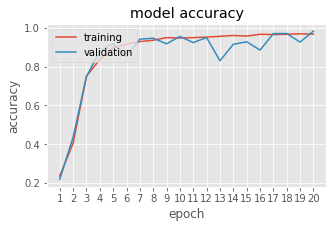

In [16]:
print(history.history.keys())

plt.style.use('ggplot')

xepochs = [i+1 for i in range(0, len(history.history['loss']))]
plt.figure(figsize=(5,3))
# Loss
#plt.ylim([-0.1,0.5])
plt.plot(xepochs, history.history['loss'])
plt.plot(xepochs, history.history['val_loss'])
plt.xticks(xepochs)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Accuracy
#plt.ylim([0.7,1.05])
plt.figure(figsize=(5,3))
plt.plot(xepochs, history.history['accuracy'])
plt.plot(xepochs, history.history['val_accuracy'])
plt.xticks(xepochs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [17]:
# MODEL 3
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(no_classes, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)        

In [18]:

model3.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# testing
history = model3.fit(
        train_datagen,
        epochs = no_epochs,
          validation_data = test_datagen,

        shuffle = False)

Epoch 1/20
395/395 [==============================] - 94s 237ms/step - loss: 2.2782 - accuracy: 0.2244 - val_loss: 1.5207 - val_accuracy: 0.4996
Epoch 2/20
395/395 [==============================] - 94s 239ms/step - loss: 1.3671 - accuracy: 0.4937 - val_loss: 1.0891 - val_accuracy: 0.6858
Epoch 3/20
395/395 [==============================] - 94s 238ms/step - loss: 0.8371 - accuracy: 0.6859 - val_loss: 0.7947 - val_accuracy: 0.7362
Epoch 4/20
395/395 [==============================] - 98s 249ms/step - loss: 0.5923 - accuracy: 0.7803 - val_loss: 0.5289 - val_accuracy: 0.8546
Epoch 5/20
395/395 [==============================] - 94s 239ms/step - loss: 0.4247 - accuracy: 0.8420 - val_loss: 0.4896 - val_accuracy: 0.8878
Epoch 6/20
395/395 [==============================] - 94s 238ms/step - loss: 0.3313 - accuracy: 0.8775 - val_loss: 0.3663 - val_accuracy: 0.9047
Epoch 7/20
395/395 [==============================] - 95s 239ms/step - loss: 0.2793 - accuracy: 0.8981 - val_loss: 0.2986 - val_ac

126/126 [==============================] - 10s 83ms/step - loss: 0.2639 - accuracy: 0.9682
Test loss: 0.2639443874359131
Test accuracy: 0.9682303071022034
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


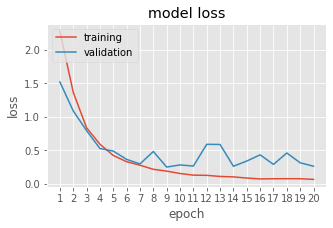

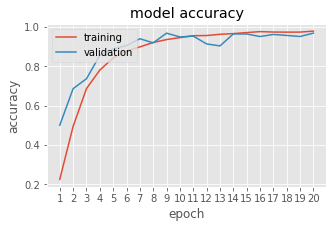

In [19]:
score = model3.evaluate(test_datagen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

plt.style.use('ggplot')

xepochs = [i+1 for i in range(0, len(history.history['loss']))]
plt.figure(figsize=(5,3))
# Loss
#plt.ylim([-0.1,0.5])
plt.plot(xepochs, history.history['loss'])
plt.plot(xepochs, history.history['val_loss'])
plt.xticks(xepochs)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Accuracy
#plt.ylim([0.7,1.05])
plt.figure(figsize=(5,3))
plt.plot(xepochs, history.history['accuracy'])
plt.plot(xepochs, history.history['val_accuracy'])
plt.xticks(xepochs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

{'Apple': '67.09%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.02%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.03%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '32.85%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 67.09%


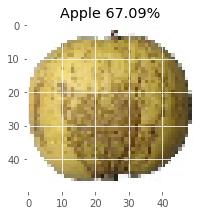

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '100.00%'}
Prediction: Watermelon (class 24) 100.00%


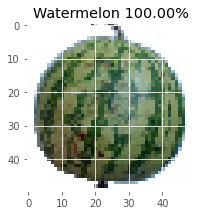

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '100.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Blueberry (class 4) 100.00%


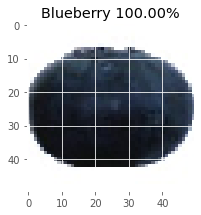

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '100.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Maracuja (class 12) 100.00%


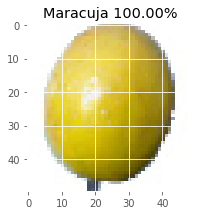

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '99.90%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.10%'}
Prediction: Mango (class 11) 99.90%


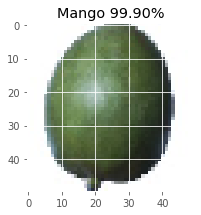

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '100.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepper Yellow (class 18) 100.00%


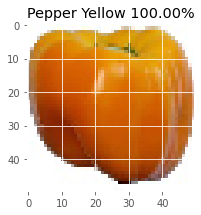

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.37%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.21%',
 'Potato Sweet': '99.42%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Potato Sweet (class 20) 99.42%


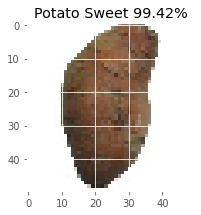

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '99.98%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.02%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Banana (class 3) 99.98%


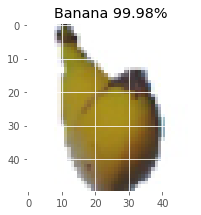

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.01%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '99.99%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Onion Red (class 13) 99.99%


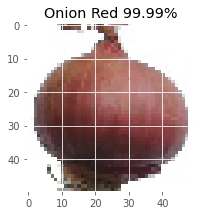

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '100.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepper Yellow (class 18) 100.00%


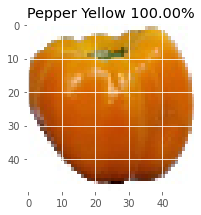

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '100.00%',
 'Watermelon': '0.00%'}
Prediction: Tomato (class 23) 100.00%


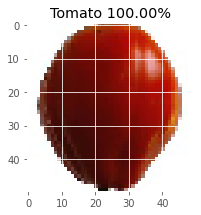

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '100.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Onion Red (class 13) 100.00%


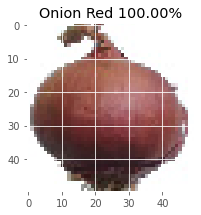

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '100.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepper Yellow (class 18) 100.00%


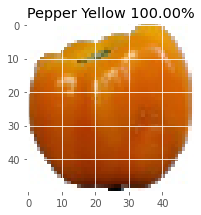

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '100.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Mandarine (class 10) 100.00%


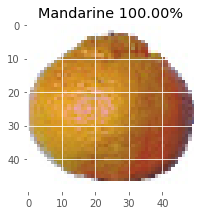

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '100.00%',
 'Watermelon': '0.00%'}
Prediction: Tomato (class 23) 100.00%


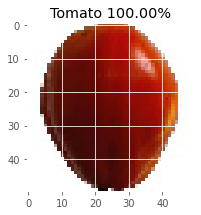

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '100.00%',
 'Watermelon': '0.00%'}
Prediction: Tomato (class 23) 100.00%


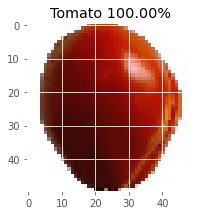

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.02%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '99.98%'}
Prediction: Watermelon (class 24) 99.98%


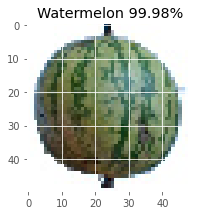

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '100.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Mandarine (class 10) 100.00%


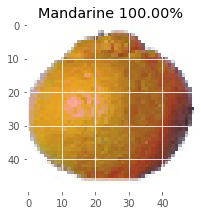

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '100.00%'}
Prediction: Watermelon (class 24) 100.00%


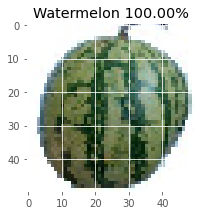

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '100.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Raspberry (class 21) 100.00%


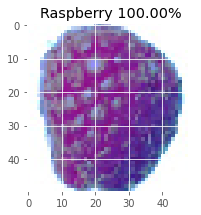

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '99.98%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.02%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pineapple (class 19) 99.98%


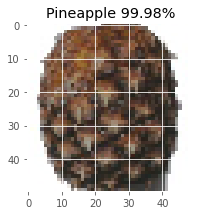

{'Apple': '0.01%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.56%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '99.15%',
 'Kiwi': '0.00%',
 'Lemon': '0.21%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.07%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Corn (class 7) 99.15%


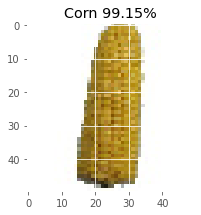

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '100.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Mandarine (class 10) 100.00%


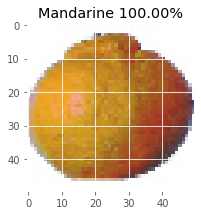

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '100.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Blueberry (class 4) 100.00%


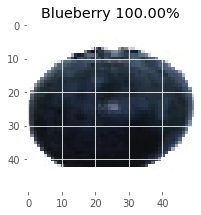

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '100.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cocos (class 6) 100.00%


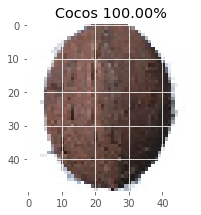

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '100.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cocos (class 6) 100.00%


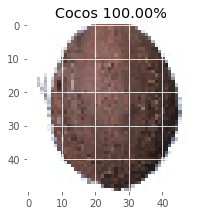

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.02%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '99.98%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cauliflower (class 5) 99.98%


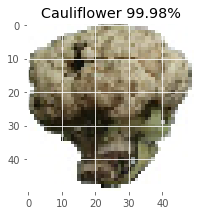

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '100.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Maracuja (class 12) 100.00%


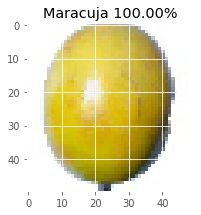

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '99.71%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.25%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.02%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.01%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Banana (class 3) 99.71%


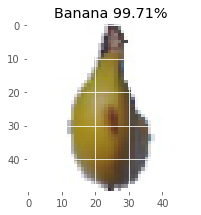

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '100.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Orange (class 14) 100.00%


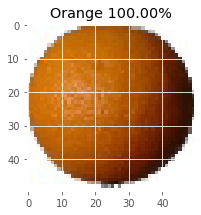

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '100.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Strawberry (class 22) 100.00%


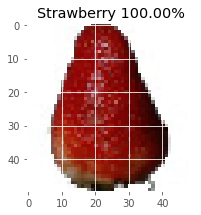

{'Apple': '0.00%',
 'Apricot': '100.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apricot (class 1) 100.00%


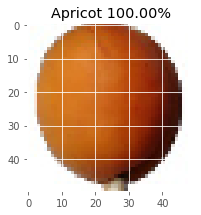

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '100.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cauliflower (class 5) 100.00%


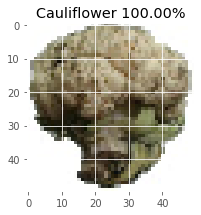

{'Apple': '0.02%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.84%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '98.69%',
 'Kiwi': '0.00%',
 'Lemon': '0.43%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.01%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Corn (class 7) 98.69%


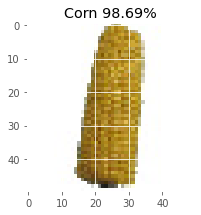

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '100.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pear (class 16) 100.00%


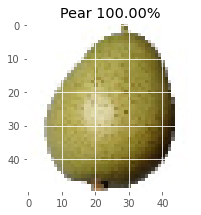

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '100.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Avocado (class 2) 100.00%


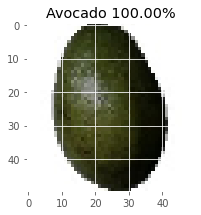

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '100.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepino (class 17) 100.00%


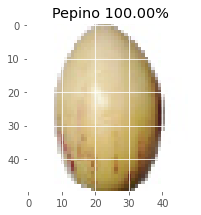

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '100.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cauliflower (class 5) 100.00%


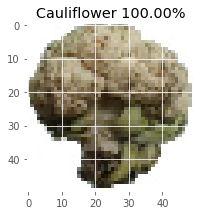

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '100.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Orange (class 14) 100.00%


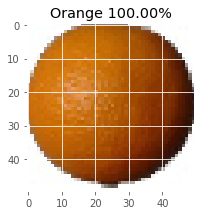

{'Apple': '0.00%',
 'Apricot': '99.25%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.75%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apricot (class 1) 99.25%


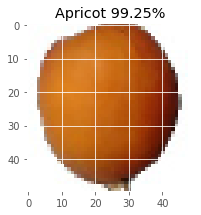

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '100.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Papaya (class 15) 100.00%


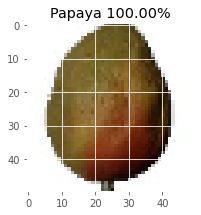

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.01%',
 'Kiwi': '0.00%',
 'Lemon': '99.98%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Lemon (class 9) 99.98%


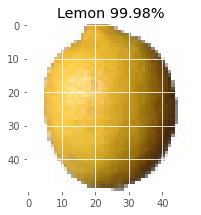

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.01%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '99.97%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.02%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Kiwi (class 8) 99.97%


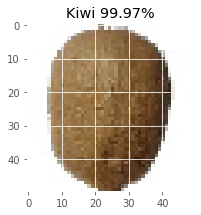

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '100.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pineapple (class 19) 100.00%


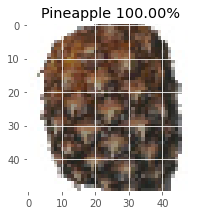

{'Apple': '0.03%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.69%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '98.73%',
 'Kiwi': '0.00%',
 'Lemon': '0.53%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.02%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Corn (class 7) 98.73%


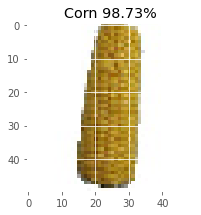

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '100.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pear (class 16) 100.00%


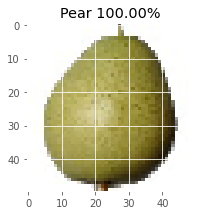

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '100.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Strawberry (class 22) 100.00%


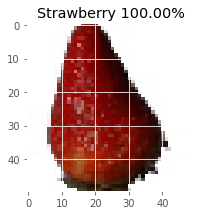

{'Apple': '0.00%',
 'Apricot': '89.53%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '10.47%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apricot (class 1) 89.53%


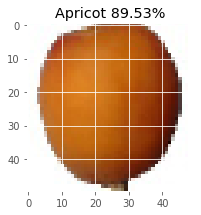

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '100.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Raspberry (class 21) 100.00%


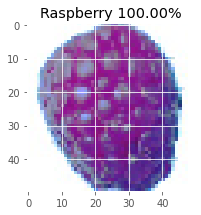

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '100.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepino (class 17) 100.00%


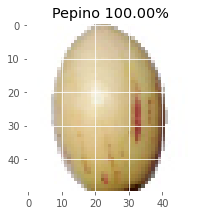

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '100.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepino (class 17) 100.00%


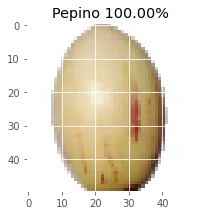

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '100.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Orange (class 14) 100.00%


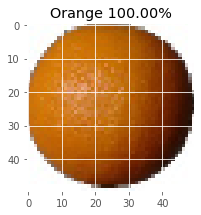

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '100.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Avocado (class 2) 100.00%


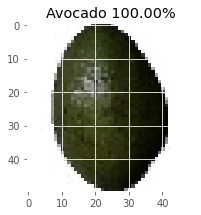

{'Apple': '91.96%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.01%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.01%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '8.02%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 91.96%


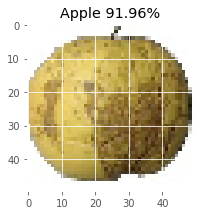

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '100.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Papaya (class 15) 100.00%


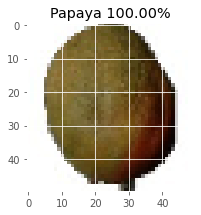

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '99.98%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.02%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Kiwi (class 8) 99.98%


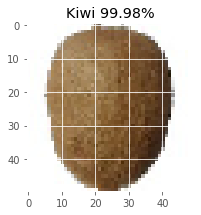

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '99.99%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Lemon (class 9) 99.99%


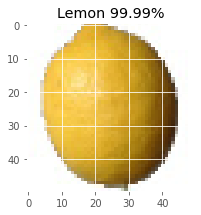

{'Apple': '0.00%',
 'Apricot': '98.27%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '1.73%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apricot (class 1) 98.27%


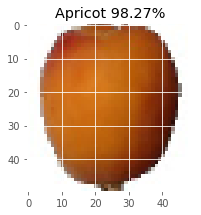

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.06%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '99.94%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Onion Red (class 13) 99.94%


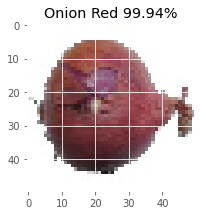

{'Apple': '87.26%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.22%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '8.83%',
 'Kiwi': '0.00%',
 'Lemon': '1.17%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.31%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '2.22%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 87.26%


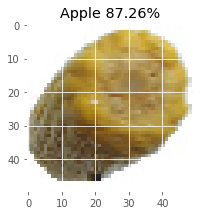

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.02%',
 'Cocos': '0.01%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.21%',
 'Potato Sweet': '99.76%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Potato Sweet (class 20) 99.76%


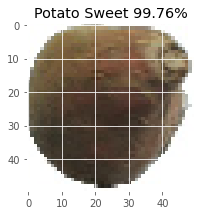

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.05%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '99.95%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepper Yellow (class 18) 99.95%


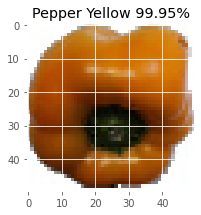

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.07%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '99.93%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Onion Red (class 13) 99.93%


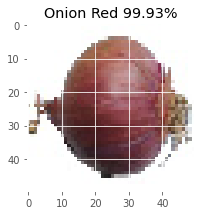

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '100.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cauliflower (class 5) 100.00%


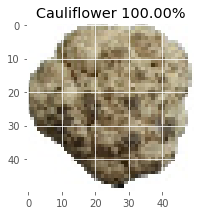

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '100.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cauliflower (class 5) 100.00%


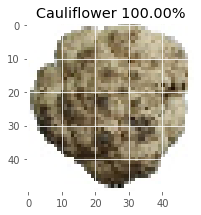

{'Apple': '81.69%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '7.91%',
 'Kiwi': '0.00%',
 'Lemon': '8.13%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '2.28%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 81.69%


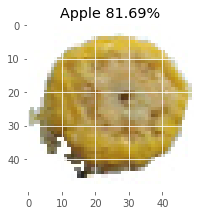

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.43%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.03%',
 'Potato Sweet': '99.54%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Potato Sweet (class 20) 99.54%


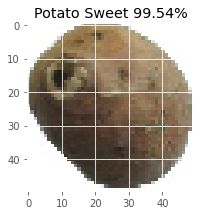

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '100.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Mandarine (class 10) 100.00%


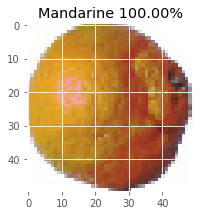

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '100.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pineapple (class 19) 100.00%


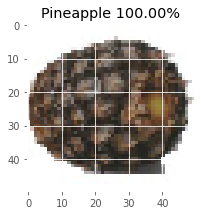

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '99.98%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.02%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cocos (class 6) 99.98%


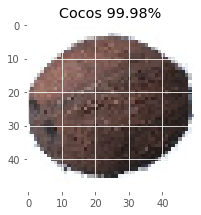

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.66%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.01%',
 'Potato Sweet': '99.33%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Potato Sweet (class 20) 99.33%


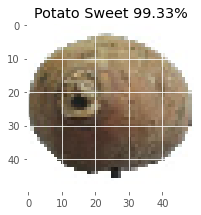

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.01%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '99.99%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepper Yellow (class 18) 99.99%


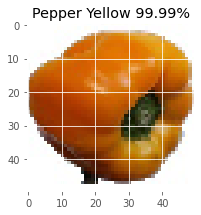

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '100.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Maracuja (class 12) 100.00%


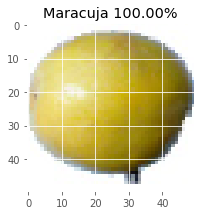

{'Apple': '9.49%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.34%',
 'Kiwi': '0.00%',
 'Lemon': '90.15%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.02%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Lemon (class 9) 90.15%


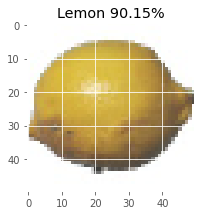

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '100.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepino (class 17) 100.00%


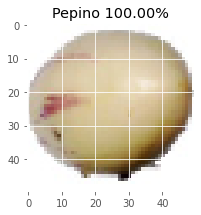

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '100.00%'}
Prediction: Watermelon (class 24) 100.00%


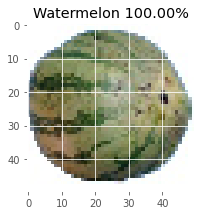

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '99.97%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.01%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.02%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cocos (class 6) 99.97%


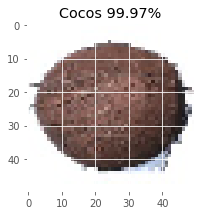

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '100.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Blueberry (class 4) 100.00%


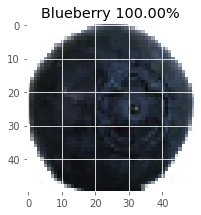

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '100.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Maracuja (class 12) 100.00%


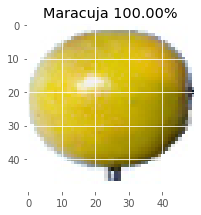

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '100.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Blueberry (class 4) 100.00%


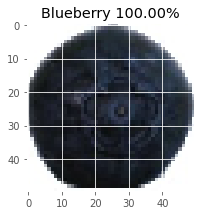

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '100.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pineapple (class 19) 100.00%


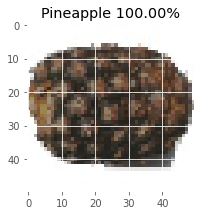

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '99.98%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.02%'}
Prediction: Mango (class 11) 99.98%


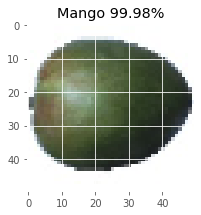

{'Apple': '0.58%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.24%',
 'Kiwi': '0.00%',
 'Lemon': '99.18%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Lemon (class 9) 99.18%


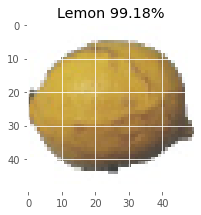

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '100.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Raspberry (class 21) 100.00%


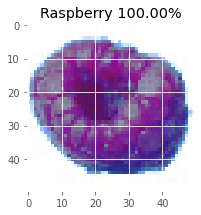

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '100.00%',
 'Watermelon': '0.00%'}
Prediction: Tomato (class 23) 100.00%


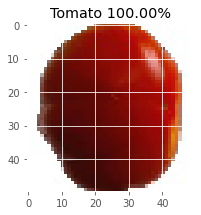

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '99.95%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.01%',
 'Cocos': '0.00%',
 'Corn': '0.04%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Banana (class 3) 99.95%


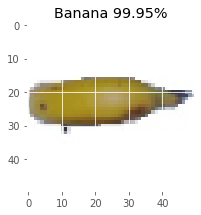

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.08%',
 'Pepino': '99.68%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.22%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pepino (class 17) 99.68%


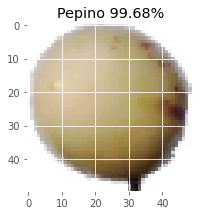

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '100.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Blueberry (class 4) 100.00%


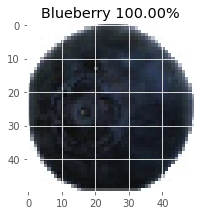

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '99.67%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.33%'}
Prediction: Mango (class 11) 99.67%


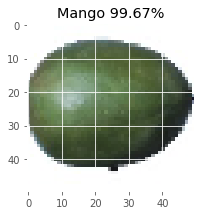

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '100.00%',
 'Watermelon': '0.00%'}
Prediction: Tomato (class 23) 100.00%


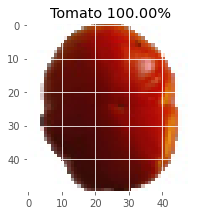

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.01%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '99.99%'}
Prediction: Watermelon (class 24) 99.99%


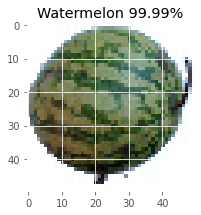

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '99.65%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.35%'}
Prediction: Mango (class 11) 99.65%


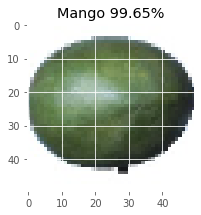

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.01%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '99.99%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Raspberry (class 21) 99.99%


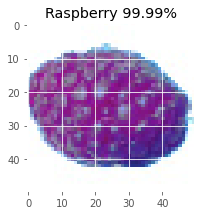

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '100.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Papaya (class 15) 100.00%


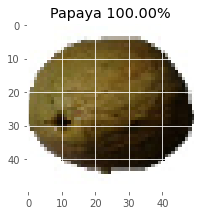

{'Apple': '97.99%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '2.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 97.99%


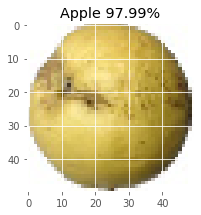

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '99.88%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.12%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Banana (class 3) 99.88%


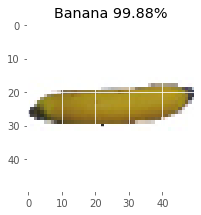

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '99.95%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.05%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Kiwi (class 8) 99.95%


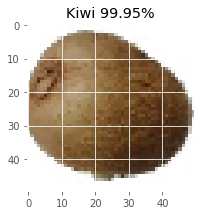

{'Apple': '1.90%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.08%',
 'Kiwi': '0.00%',
 'Lemon': '98.01%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Lemon (class 9) 98.01%


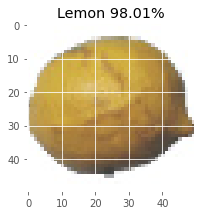

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '100.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Strawberry (class 22) 100.00%


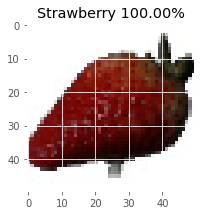

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '100.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Papaya (class 15) 100.00%


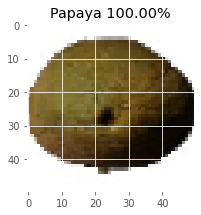

{'Apple': '98.02%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '1.98%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 98.02%


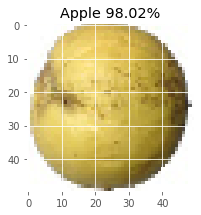

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '100.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Avocado (class 2) 100.00%


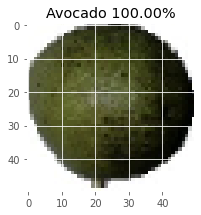

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '100.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Onion Red (class 13) 100.00%


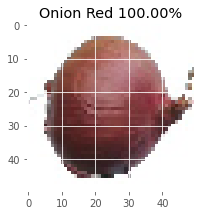

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.01%',
 'Mandarine': '99.99%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Mandarine (class 10) 99.99%


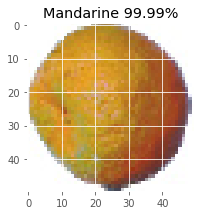

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '100.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Cocos (class 6) 100.00%


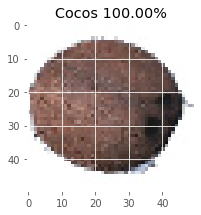

{'Apple': '0.00%',
 'Apricot': '100.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apricot (class 1) 100.00%


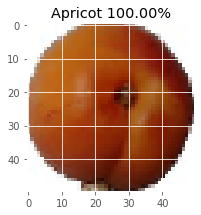

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '100.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pear (class 16) 100.00%


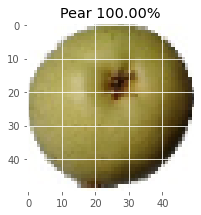

{'Apple': '0.00%',
 'Apricot': '0.01%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '99.99%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Orange (class 14) 99.99%


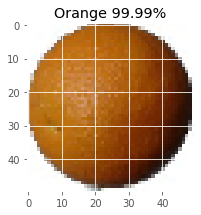

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '100.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Potato Sweet (class 20) 100.00%


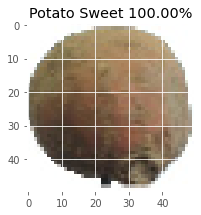

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '99.97%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.02%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Kiwi (class 8) 99.97%


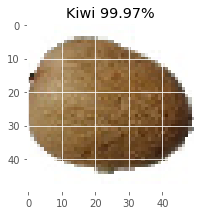

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '100.00%',
 'Watermelon': '0.00%'}
Prediction: Tomato (class 23) 100.00%


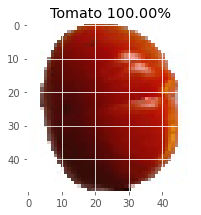

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '99.99%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.01%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Banana (class 3) 99.99%


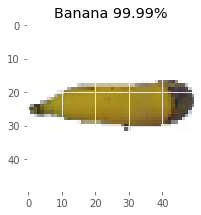

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '100.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pineapple (class 19) 100.00%


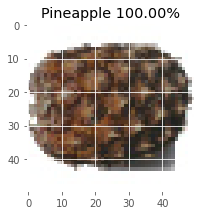

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '100.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Strawberry (class 22) 100.00%


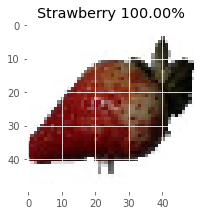

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '100.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Papaya (class 15) 100.00%


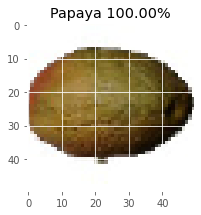

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '100.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pear (class 16) 100.00%


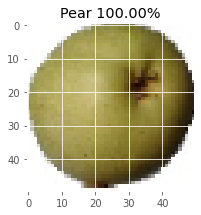

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '99.04%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.96%'}
Prediction: Mango (class 11) 99.04%


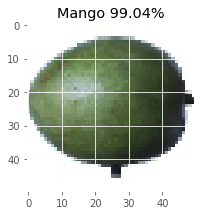

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '100.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Maracuja (class 12) 100.00%


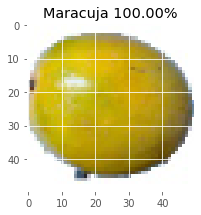

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '100.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Avocado (class 2) 100.00%


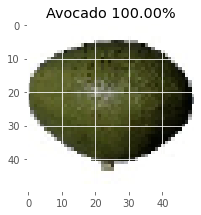

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '100.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Avocado (class 2) 100.00%


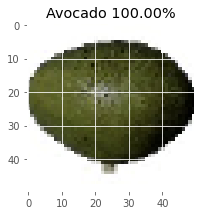

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.01%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '99.97%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.02%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Kiwi (class 8) 99.97%


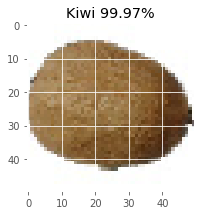

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '100.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Strawberry (class 22) 100.00%


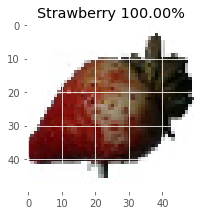

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '100.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Orange (class 14) 100.00%


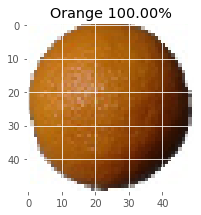

{'Apple': '99.94%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.05%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Apple (class 0) 99.94%


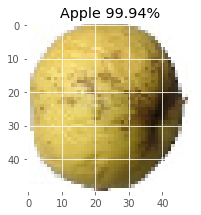

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.00%',
 'Pear': '0.00%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '100.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Raspberry (class 21) 100.00%


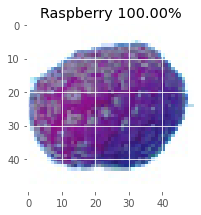

{'Apple': '0.00%',
 'Apricot': '0.00%',
 'Avocado': '0.00%',
 'Banana': '0.00%',
 'Blueberry': '0.00%',
 'Cauliflower': '0.00%',
 'Cocos': '0.00%',
 'Corn': '0.00%',
 'Kiwi': '0.00%',
 'Lemon': '0.00%',
 'Mandarine': '0.00%',
 'Mango': '0.00%',
 'Maracuja': '0.00%',
 'Onion Red': '0.00%',
 'Orange': '0.00%',
 'Papaya': '0.02%',
 'Pear': '99.98%',
 'Pepino': '0.00%',
 'Pepper Yellow': '0.00%',
 'Pineapple': '0.00%',
 'Potato Sweet': '0.00%',
 'Raspberry': '0.00%',
 'Strawberry': '0.00%',
 'Tomato': '0.00%',
 'Watermelon': '0.00%'}
Prediction: Pear (class 16) 99.98%


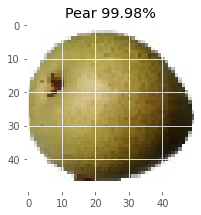

<Figure size 432x288 with 0 Axes>

In [20]:
#predict image with the best model = model1
PREDICTION_PATH = results_path = '/content/drive/My Drive/DeepLearning_2020/FinalProject/Big_Dataset/for-prediction'
images_for_prediction = [filename for filename in sorted(os.listdir(PREDICTION_PATH)) if filename.endswith(".jpg")]


for filename in images_for_prediction:
    loaded_image = k.preprocessing.image.load_img(path=PREDICTION_PATH+'/'+filename, target_size=(img_width, img_height, img_num_channels))
    #convert to array and resample dividing by 255
    img_array = k.preprocessing.image.img_to_array(loaded_image) / 255.

    img_np_array = np.expand_dims(img_array, axis = 0)
#use model 1 to predict
    predictions = model1.predict(img_np_array)
    classidx = np.argmax(predictions[0])
    label = trained_classes_labels[classidx]

    predictions_pct = ["{:.2f}%".format(prob * 100) for prob in predictions[0] ]
    pprint(dict(zip(trained_classes_labels, predictions_pct)) )
    print("Prediction: %s (class %s) %s" % (label, classidx, predictions_pct[classidx])) 

    plt.figure(figsize=(3,4))
    plt.imshow(img_array)
    plt.title("%s %s" % (label, predictions_pct[classidx]))
    plt.show()

plt.gcf().clear()